In [1]:
import SimpleITK as sitk
import nibabel as nib
import matplotlib.pyplot as plt
import skimage.transform as sk
import numpy as np
import os

In [2]:
def window_image(image, window_center=60, window_width=120):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    return window_image

In [3]:
path = "/data/Datasets/stroke/ggarzon/unreg_t0t1/"
output_path = "/data/Datasets/stroke/ggarzon/unreg_t0t1_png/"
#moving_path = "/data/Datasets/stroke/ggarzon/test/Dw_syntheti_Ax_DWI_B-1000_CEREBRAL-PERDIDA_NM_20211129221948_400.nii"

In [4]:
x = y = 0
lista = [['ACV-001_20211130163532.nii.gz',15,32],
 ['ACV-001_20211201195731.nii.gz',11,24],
 ['ACV-009_20211119120551.nii.gz',10,26],
 ['ACV-009_20211120055854.nii.gz',12,29],
 ['ACV-010_20211115223833.nii.gz',13,20],
 ['ACV-010_20211116082807.nii.gz',7,19],
 ['ACV-021_20211024160801.nii.gz',x,y],
 ['ACV-021_20211026061836.nii.gz',x,y],
 ['ACV-022_20211023060902.nii.gz',x,y],
 ['ACV-022_20211026060058.nii.gz',x,y],
 ['ACV-027_20211003145541.nii.gz',x,y],
 ['ACV-027_20211004052913.nii.gz',x,y],
 ['ACV-029_20211112075237.nii.gz',x,y],
 ['ACV-029_20211113053643.nii.gz',x,y],
 ['ACV-031_20211106200929.nii.gz',x,y],
 ['ACV-031_20211113120803.nii.gz',x,y],
 ['ACV-037_20211118032811.nii.gz',x,y],
 ['ACV-037_20211119061748.nii.gz',x,y],
 ['ACV-038_20211206194324.nii.gz',x,y],
 ['ACV-038_20211207053547.nii.gz',x,y],
 ['ACV-039_20211209200751.nii.gz',x,y],
 ['ACV-039_20211210054737.nii.gz',x,y],
 ['ACV-043_20211213155705.nii.gz',x,y],
 ['ACV-043_20211214060102.nii.gz',x,y],
 ['ACV-045_20211213113042.nii.gz',x,y],
 ['ACV-045_20211214050718.nii.gz',x,y],
 ['ACV-046_20211213115122.nii.gz',x,y],
 ['ACV-046_20211214045807.nii.gz',x,y],
 ['ACV-060_20220105175422.nii.gz',x,y],
 ['ACV-060_20220106055024.nii.gz',x,y],
 ['ACV-067_20220116175119.nii.gz',x,y],
 ['ACV-067_20220117063038.nii.gz',x,y],
 ['ACV-070_20220122053454.nii.gz',x,y],
 ['ACV-070_20220124051138.nii.gz',x,y],
 ['ACV-078_20220212.nii.gz',x,y],
 ['ACV-078_20220213.nii.gz',x,y],
 ['ACV-083_20220220222840.nii.gz',x,y],
 ['ACV-083_20220221061826.nii.gz',x,y],
 ['ACV-084_20220222153659.nii.gz',x,y],
 ['ACV-084_20220223061244.nii.gz',x,y],
 ['ACV-085_20220224115602.nii.gz',x,y],
 ['ACV-085_20220225053124.nii.gz',x,y],
 ['ACV-086_20220305085409.nii.gz',x,y],
 ['ACV-086_20220306054817.nii.gz',x,y],
 ['ACV-087_20220309080254.nii.gz',x,y],
 ['ACV-087_20220310060736.nii.gz',x,y],
 ['ACV-089_20220311110827.nii.gz',x,y],
 ['ACV-089_20220312054916.nii.gz',x,y],
 ['ACV-090_20220318110817.nii.gz',x,y],
 ['ACV-090_20220319060532.nii.gz',x,y]]

In [6]:
for k,file in enumerate(sorted(os.listdir(path))):
    if k<6:
        pre = file.split(".")[0]
        #post = file.split(".")[1]
        imgtemp = nib.load(path+file)
        img = window_image(imgtemp.get_fdata())
        print(pre, lista[k][1], lista[k][2])
        img = img[:,:,lista[k][1]:lista[k][2]]
        for s in range(img.shape[2]):
            result = sk.resize(img[:,:,s], (256,256))
            result = sk.rotate(result, 90)
            plt.imsave(output_path+pre+"_"+str(lista[k][1]+s)+".png", result, cmap="gray")
        print(img.shape)
        #break

ACV-001_20211130163532 15 32
(512, 512, 17)
ACV-001_20211201195731 11 24
(512, 512, 13)
ACV-009_20211119120551 10 26
(512, 512, 16)
ACV-009_20211120055854 12 29
(512, 512, 17)
ACV-010_20211115223833 13 20
(512, 512, 7)
ACV-010_20211116082807 7 19
(512, 512, 12)


In [28]:
imgtemp = nib.load(fixed_path)
img = window_image(imgtemp.get_fdata())

In [19]:
result1 = sk.resize(img[:,:,12], (256,256))
clipped_img = nib.Nifti1Image(result1, imgtemp.affine)
nib.save(clipped_img, "fixed.nii")

In [29]:
plt.imshow(img[:,:,12], cmap="gray")
plt.show()

In [33]:
np.amin(img), np.amax(img)

(0.0, 120.0)

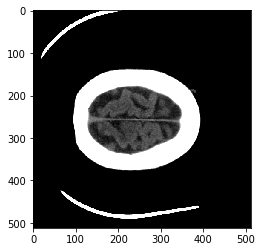

In [23]:
imgtemp = nib.load(path+'ACV-001_20211130163532.nii')
img = imgtemp.get_fdata()
plt.imshow(img[:,:,15], cmap="gray", vmin=0, vmax=120)
plt.show()